This chapter contains the details of basics of machine learning

Determining Happiness Index of a country from it's GDP

Happiness Index data: [Keggle](https://www.kaggle.com/unsdsn/world-happiness)

GDP Data: [IMF Website](https://www.imf.org/external/pubs/ft/weo/2016/01/weodata/weorept.aspx?pr.x=32&pr.y=8&sy=2015&ey=2015&scsm=1&ssd=1&sort=country&ds=.&br=1&c=512%2C668%2C914%2C672%2C612%2C946%2C614%2C137%2C311%2C962%2C213%2C674%2C911%2C676%2C193%2C548%2C122%2C556%2C912%2C678%2C313%2C181%2C419%2C867%2C513%2C682%2C316%2C684%2C913%2C273%2C124%2C868%2C339%2C921%2C638%2C948%2C514%2C943%2C218%2C686%2C963%2C688%2C616%2C518%2C223%2C728%2C516%2C558%2C918%2C138%2C748%2C196%2C618%2C278%2C624%2C692%2C522%2C694%2C622%2C142%2C156%2C449%2C626%2C564%2C628%2C565%2C228%2C283%2C924%2C853%2C233%2C288%2C632%2C293%2C636%2C566%2C634%2C964%2C238%2C182%2C662%2C453%2C960%2C968%2C423%2C922%2C935%2C714%2C128%2C862%2C611%2C135%2C321%2C716%2C243%2C456%2C248%2C722%2C469%2C942%2C253%2C718%2C642%2C724%2C643%2C576%2C939%2C936%2C644%2C961%2C819%2C813%2C172%2C199%2C132%2C733%2C646%2C184%2C648%2C524%2C915%2C361%2C134%2C362%2C652%2C364%2C174%2C732%2C328%2C366%2C258%2C734%2C656%2C144%2C654%2C146%2C336%2C463%2C263%2C528%2C268%2C923%2C532%2C738%2C944%2C578%2C176%2C537%2C534%2C742%2C536%2C866%2C429%2C369%2C433%2C744%2C178%2C186%2C436%2C925%2C136%2C869%2C343%2C746%2C158%2C926%2C439%2C466%2C916%2C112%2C664%2C111%2C826%2C298%2C542%2C927%2C967%2C846%2C443%2C299%2C917%2C582%2C544%2C474%2C941%2C754%2C446%2C698%2C666&s=NGDPDPC&grp=0&a=#download)
    

1. we read the Happiness Index data from local CSV file into a Pandas Dataframe.

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 10)
happiness_index = pd.read_csv("happiness_2015.csv", thousands=',')
happiness_index

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


2. The Keggle Datasource also specifies GDP per capita. Hence we are using that instead of pulling from another source.

In [3]:
happiness_index[['Country','Happiness Score','Economy (GDP per Capita)']]

,Country,Happiness Score,Economy (GDP per Capita)
0,Switzerland,7.587,1.39651
1,Iceland,7.561,1.30232
2,Denmark,7.527,1.32548
3,Norway,7.522,1.45900
4,Canada,7.427,1.32629
...,...,...,...
153,Rwanda,3.465,0.22208
154,Benin,3.340,0.28665
155,Syria,3.006,0.66320
156,Burundi,2.905,0.01530


3. Now we plot the GDP vs happiness score

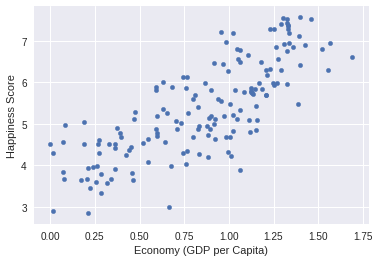

In [4]:
happiness_index.plot(kind='scatter', x='Economy (GDP per Capita)',y="Happiness Score")
plt.show()

4. Now we train the a Linear regression model with this data.

In [5]:
from sklearn.linear_model import LinearRegression

X = np.c_[happiness_index['Economy (GDP per Capita)']]
y = np.c_[happiness_index['Happiness Score']]

# Select a linear model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[1.12]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

[[5.98322403]]
